In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [35]:
df_data = pd.read_csv('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')
df_menu = pd.read_csv('XTern 2024 Artificial Intelegence Data Set - Menu.csv')

In [36]:
df_data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [37]:
df_menu.head(10)

,Unnamed: 0,Item,Price,Calories
0,0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,1,Cornbread Hush Puppies,5,250
2,2,Breaded Pork Tenderloin Sandwich,9,550
3,3,Indiana Pork Chili,7,300
4,4,Fried Catfish Basket,10,600
5,5,Ultimate Grilled Cheese Sandwich (with bacon a...,6,450
6,6,Sweet Potato Fries,4,200
7,7,Indiana Corn on the Cob (brushed with garlic b...,3,150
8,8,Indiana Buffalo Chicken Tacos (3 tacos),9,400
9,9,Sugar Cream Pie,4,450


In [38]:
merged_df = df_data.merge(df_menu, left_on = "Order", right_on = "Item", how="left")
merged_df = merged_df.rename(columns={"Price": "Order Price"})
merged_df = merged_df.drop('Item', axis=1)

In [39]:
merged_df.drop('Unnamed: 0', axis=1)

,Year,Major,University,Time,Order,Order Price,Calories
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket,10,600
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie,4,450
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili,7,300
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket,10,600
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...,3,150
...,...,...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich,9,550
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...,6,450
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie,4,450
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie,4,450


In [40]:
new_order = ["Year", "Major", "University", "Time", "Order Price", "Calories", "Order"]

In [64]:
merged_df = merged_df[new_order]
merged_df.head(10)

,Year,Major,University,Time,Order Price,Calories,Order
0,Year 2,Physics,Indiana State University,12,10,600,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,4,450,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,7,300,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,10,600,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,3,150,Indiana Corn on the Cob (brushed with garlic b...
5,Year 2,Biology,Indiana State University,12,7,300,Indiana Pork Chili
6,Year 2,Physics,Butler University,12,10,600,Fried Catfish Basket
7,Year 2,Anthropology,Indiana University-Purdue University Indianapo...,11,10,600,Fried Catfish Basket
8,Year 2,Mathematics,Indiana State University,15,9,400,Indiana Buffalo Chicken Tacos (3 tacos)
9,Year 3,Business Administration,Indiana State University,12,9,400,Indiana Buffalo Chicken Tacos (3 tacos)


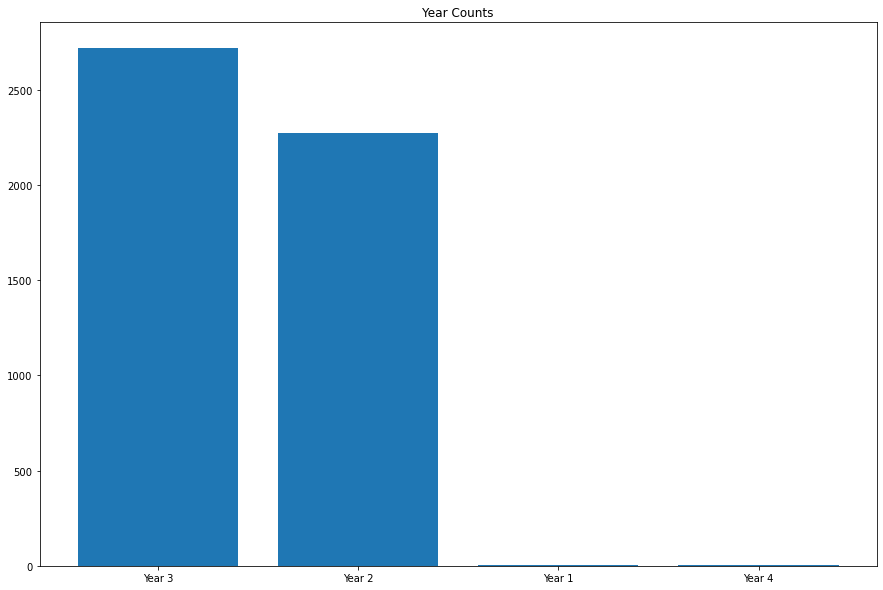

In [47]:
#data visualization and eda
fig, axes = plt.subplots(figsize=(15, 10))
year_counts = merged_df['Year'].value_counts()
axes.bar(year_counts.index, year_counts)
axes.set_title('Year Counts')

plt.show()

Here we can notice that student's in Year 3 (over 2500 orders) have ordered the most amount of food. Year 2 students have also ordered quite a lot (about 2200). Student's in Year 1 and Year 4 

In [52]:
#there are 20 majors
major_counts = merged_df['Major'].value_counts()
print(major_counts.shape)

(20,)


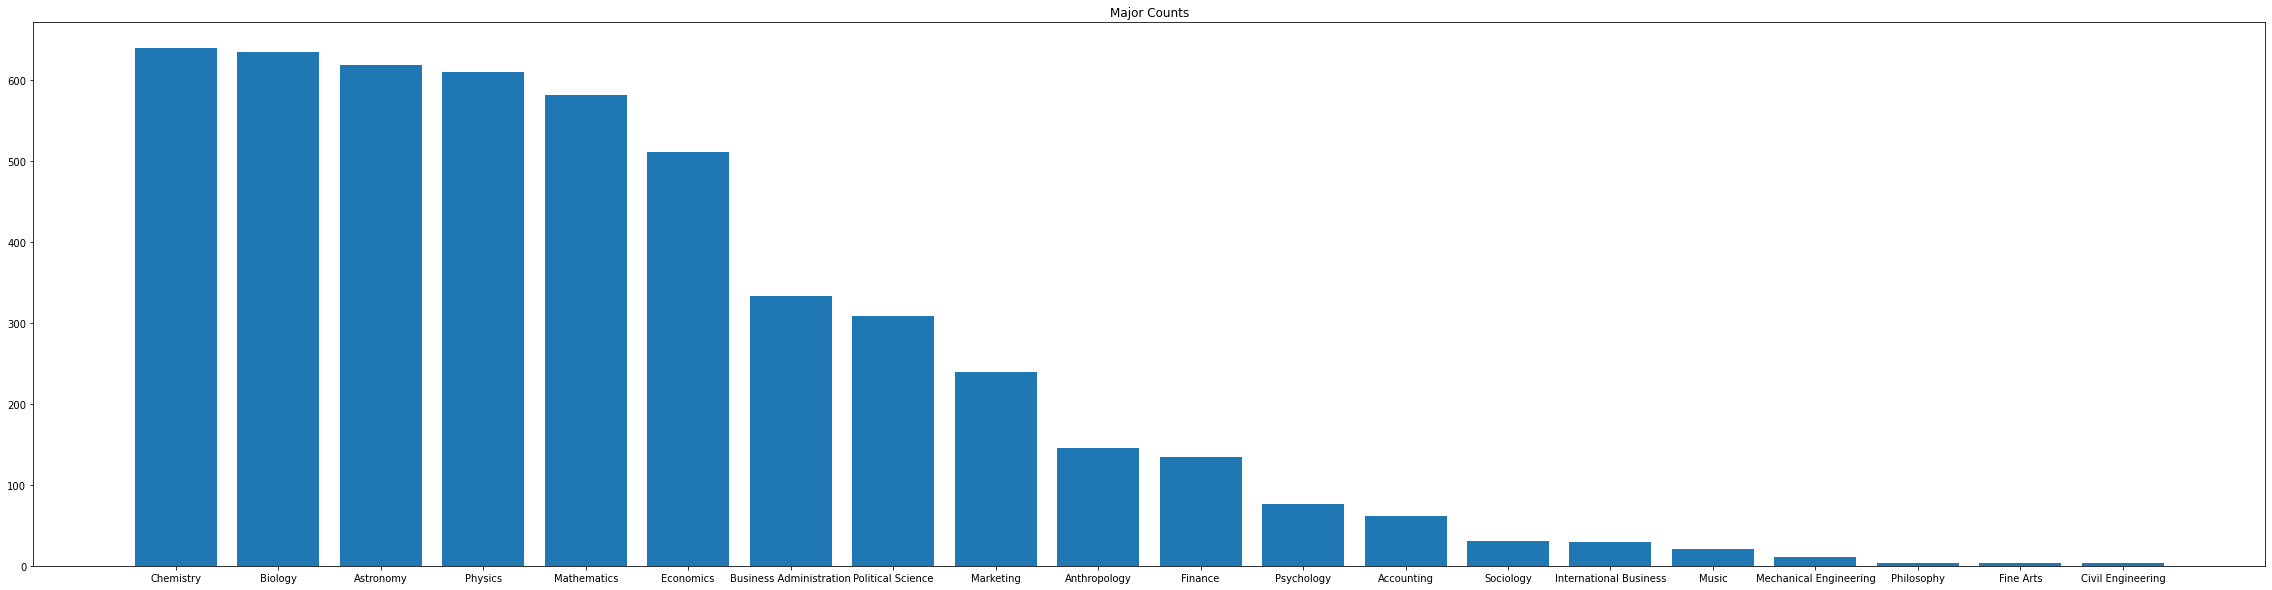

In [57]:
#here is the bar plot for the number of each major
fig, ax = plt.subplots(figsize=(40, 10))
ax.bar(major_counts.index, major_counts)
ax.set_title('Major Counts')
plt.show()

In [60]:
university_count = merged_df['University'].value_counts()
print(university_count.shape)

(10,)


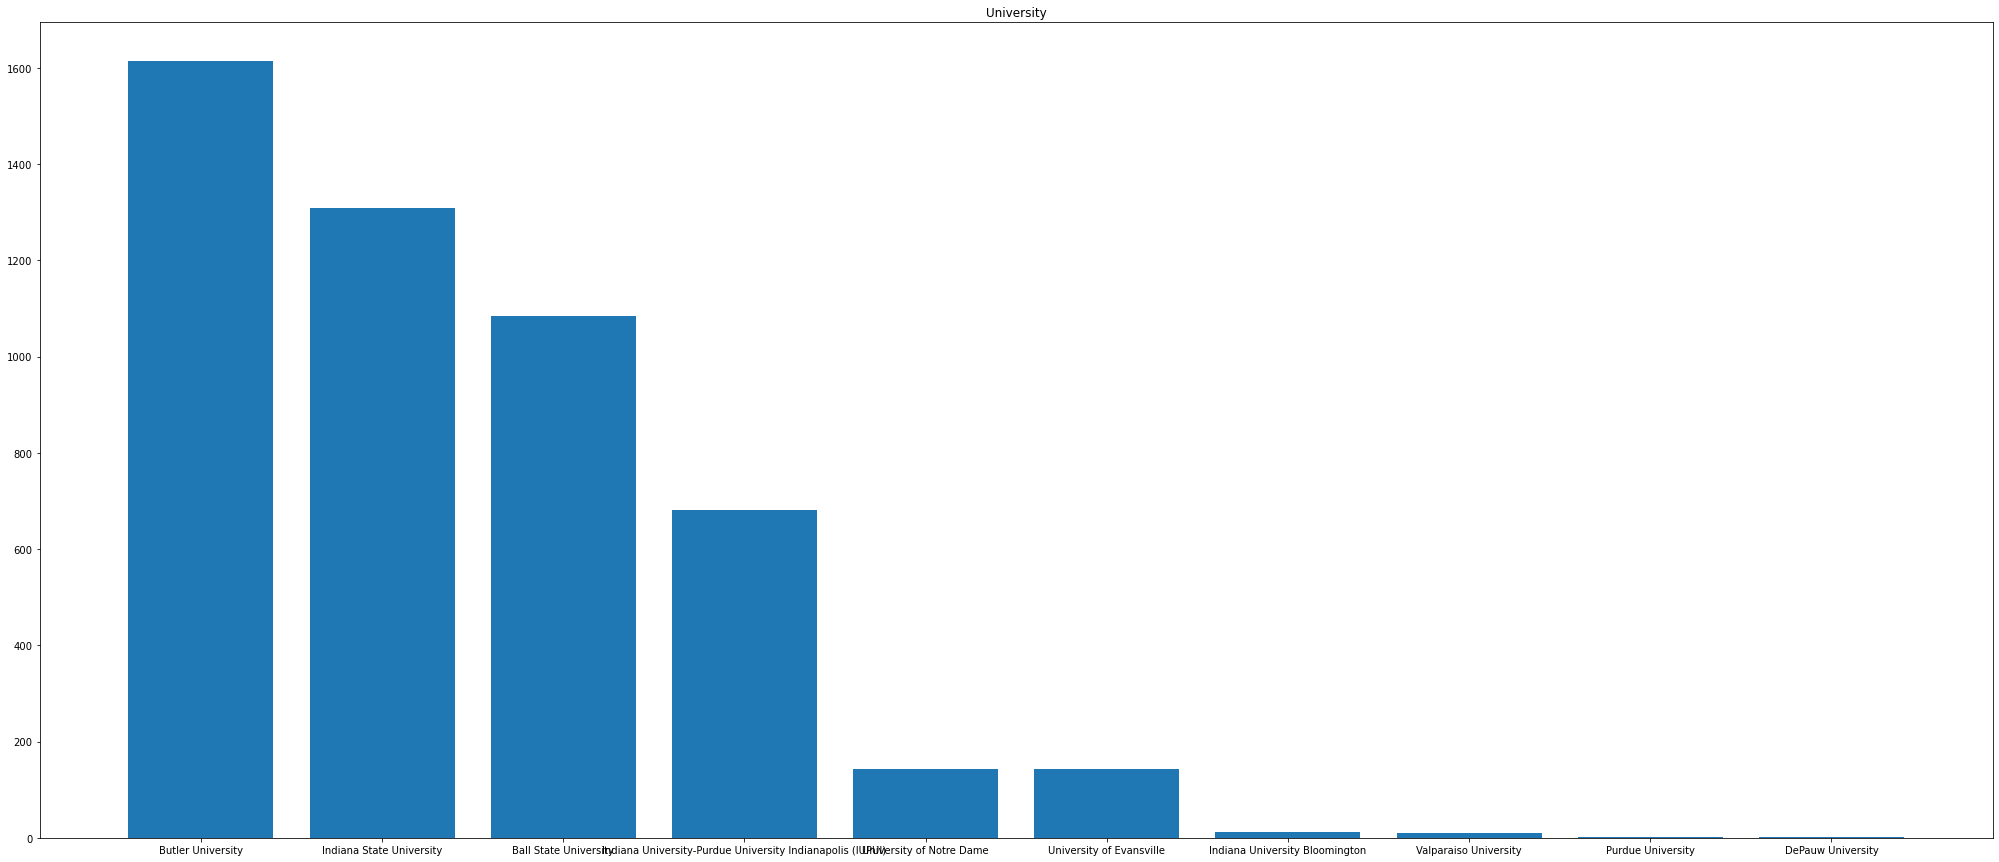

In [63]:
#here is the bar plot for the number of each major
fig, ax = plt.subplots(figsize=(35, 15))
ax.bar(university_count.index, university_count)
ax.set_title('University')
plt.show()

In [31]:
#feature processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le_year = LabelEncoder()
ohe_major = OneHotEncoder()
final_df['Year'] = le_year.fit_transform(merged_df['Year'])
final_df['Major'] = 

<ipython-input-31-9ee6f498627c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Year'] = le_year.fit_transform(merged_df['Year'])


In [42]:
merged_df['Year'].value_counts()

Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64